## Importing dependency
---


In [1]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
# installing execution time measurement tools 
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2020-12-30 19:23:20 +01:00)


# CRISP-DM
**CRISP-DM** will be used as the methodology to answering the business questions above. 
1. Business Understanding  
To understand the business, the business questions must be defined (see. **Introduction**)
2. Data Understanding  
From the business questions, the dataset will be analyzed, and the useful data feature will be selected accordingly.
3. Prepare Data  
The raw data are mostly not clean, in this phase, we will clean the data, so it will be ready for training the prediction later. 
4. Model Data  
Linear Regression will be used to train the prediction model. R-square Score will be calculated.
5. Results  
The results will be presented in a Medium article.
6. Deploy  
In this project there will be no deployment.


In this notebook, I will do the CRISP-DM Process for each question. The phase **Data Understanding** and **Prepare Data** will be executed for each Question. The reason is that for the 1st and 2nd questions, I only need some column from the dataset, and does not need anthing else, so we could use just the original dataset without cleaning.

# Dataset
---
The datasets are obtained from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 

To answer the business questions, only the [detailed](http://data.insideairbnb.com/germany/bv/munich/2020-10-26/data/listings.csv.gz) (not the [summary data](http://data.insideairbnb.com/germany/bv/munich/2020-10-26/visualisations/listings.csv) data used in this analysis.

In [5]:
# reading csv and load it to the dataframe
listings = pd.read_csv('data/listings.csv.gz', compression='gzip')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20201026064122,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,10.0,9.0,9.0,NaN,f,2,2,0,0,1.21
1,170154,https://www.airbnb.com/rooms/170154,20201026064122,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,10.0,10.0,10.0,NaN,f,1,0,1,0,4.30
2,170815,https://www.airbnb.com/rooms/170815,20201026064122,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,814793,https://www.airbnb.com/users/show/814793,...,10.0,9.0,9.0,NaN,f,1,1,0,0,0.57
3,171749,https://www.airbnb.com/rooms/171749,20201026064122,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,819382,https://www.airbnb.com/users/show/819382,...,10.0,10.0,10.0,NaN,t,1,0,1,0,3.15
4,172672,https://www.airbnb.com/rooms/172672,20201026064122,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,823913,https://www.airbnb.com/users/show/823913,...,10.0,10.0,10.0,NaN,f,2,1,1,0,2.72


time: 156 ms (started: 2020-12-30 19:24:57 +01:00)


In [6]:
# getting dimension of the dataframe
listings.shape

(4694, 74)

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


### Columns

In [7]:
# show all possible columns
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


In [8]:
# all columns name with non empty / missing value
listings.columns[np.sum(listings.isnull()) == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'picture_url',
       'host_id', 'host_url', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


In [9]:
# getting the column type
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4694 entries, 0 to 4693
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4694 non-null   int64  
 1   listing_url                                   4694 non-null   object 
 2   scrape_id                                     4694 non-null   int64  
 3   last_scraped                                  4694 non-null   object 
 4   name                                          4693 non-null   object 
 5   description                                   4522 non-null   object 
 6   neighborhood_overview                         2495 non-null   object 
 7   picture_url                                   4694 non-null   object 
 8   host_id                                       4694 non-null   int64  
 9   host_url                                      4694 non-null   o

# Helper Function

In [10]:
def find_column_name(name:str, listings=listings) -> list:
  '''
  A helper function that will lookup the listings dataframe, whether there are column contains given name.

  INPUT - name - string included in the column name
          listings - pandas dataframe in which the column need to be looked for.
  OUTPUT - list of matching column name, if there is no column name matched, empty list will be returned
  '''
  columns_in_string = list(listings.columns)
  result = []
  for column_name in columns_in_string:
    if name in column_name:
      result.append(column_name)
  return result

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


In [11]:
find_column_name('neighbourhood')

['host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed']

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


In [12]:
def convert_price_to_float(price) -> float:
    '''
    A helper function to convert given price in string to a float. 
    Example: $80,50 => 80.5
  
    INPUT - price - price in string beginning with $ or €, if it is a float, the value will just be returned directly
    OUTPUT - price in float
    '''
    if isinstance(price, float):
      return price
    return float(price[1:].replace(',',''))

time: 0 ns (started: 2020-12-30 19:24:58 +01:00)


In [13]:
convert_price_to_float('$ 80.50')

80.5

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [14]:
convert_price_to_float(80.50)

80.5

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [15]:
convert_price_to_float('$3,000.00')

3000.0

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [16]:
def count_null_value(col_name=str, listings=listings) -> int:
    '''
    A helper function to count the amount of null value by given column name. 
  
    INPUT - col_name - column name to looked for
            listings - pandas dataframe in which the column need to be looked for.
    OUTPUT - amount of missing value
    '''
    return listings[listings[col_name].isnull()==True].shape[0]

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [17]:
count_null_value('beds')

52

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


# Q1 : How many accommodation has most of the Airbnb host in Munich?

To find out the frequency of each host, first we need to count accommodation amount from each user. From the data, then we could create a frequency table. 


## Data Understanding & Analyze
We will look deeper into the `host_id` column, and we need to make sure, that there is no empty `host_id`.

In [18]:
# check if there is no empty/null host_id
listings['host_id'].isna().sum()

0

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [19]:
# count listing amount per host_id 
group_by_host_listings = listings['host_id'].value_counts().rename_axis('host_id').reset_index(name='counts')
group_by_host_listings.head()

,host_id,counts
0,364189334,23
1,2266917,21
2,175608026,18
3,51557252,18
4,205832270,16


time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


In [20]:
# count frequency from each accommodation amount
listing_amount_frequency = group_by_host_listings['counts'].value_counts()
listing_amount_frequency.head(10)

1     3179
2      297
3       84
4       35
5       20
6       20
7        9
8        4
9        3
10       3
Name: counts, dtype: int64

time: 0 ns (started: 2020-12-30 19:24:59 +01:00)


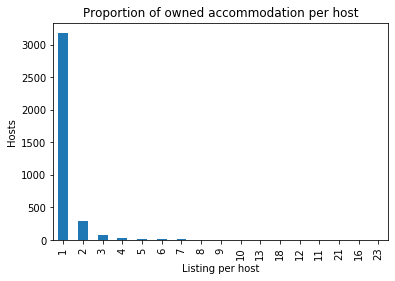

time: 281 ms (started: 2020-12-30 19:24:59 +01:00)


In [21]:
# bar-plotting
listing_amount_frequency.plot(kind='bar')
plt.title('Proportion of owned accommodation per host')
plt.xlabel('Listing per host')
plt.ylabel('Hosts')
plt.savefig('plot/accommodation_per_host.png')

In [22]:
listing_frequency_df=listing_amount_frequency.to_frame().reset_index().rename(columns={'index':'listing_amount', 'counts': 'hosts'})
listing_frequency_df.head()

,listing_amount,hosts
0,1,3179
1,2,297
2,3,84
3,4,35
4,5,20


time: 0 ns (started: 2020-12-30 19:25:00 +01:00)


In [23]:
# calculate percentage of single listing
single_listing_percentage=listing_frequency_df[listing_frequency_df['listing_amount'] == 1]['hosts'] / listings.shape[0]
single_listing_percentage

0    0.677248
Name: hosts, dtype: float64

time: 15 ms (started: 2020-12-30 19:25:00 +01:00)


In [24]:
# calculate percentage of multi listing
multi_listing_percentage=1-(listing_frequency_df[listing_frequency_df['listing_amount'] == 1]['hosts'] / listings.shape[0])
multi_listing_percentage

0    0.322752
Name: hosts, dtype: float64

time: 0 ns (started: 2020-12-30 19:25:00 +01:00)


In [25]:
# calculate percentage of single listing
np.sum(listing_frequency_df[listing_frequency_df['listing_amount'] != 1]['hosts'])

485

time: 16 ms (started: 2020-12-30 19:25:00 +01:00)


=> Now we will look more into the top 5 hosts with multiple listings.

In [26]:
# get the top 5 most listing_amount
listing_frequency_df.sort_values(by='listing_amount', ascending=False).head(5).reset_index(drop=True)

,listing_amount,hosts
0,23,1
1,21,1
2,18,2
3,16,1
4,13,2


time: 0 ns (started: 2020-12-30 19:25:00 +01:00)


=> Let us dig deeper into this host `364189334` and `2266917`, such as what kind of `room_types`, `name`, `description`, where is it located `neighbourhood_cleansed`.

In [27]:
# lets find out what kind of room_type this host has
listings[listings['host_id'] == 364189334]['room_type'].value_counts()

Private room    23
Name: room_type, dtype: int64

time: 0 ns (started: 2020-12-30 19:25:00 +01:00)


In [28]:
dig_deeper_cols=['name', 'description', 'neighbourhood_cleansed', 'room_type']

time: 0 ns (started: 2020-12-30 19:25:01 +01:00)


In [29]:
# lets find out what kind of listing name this host has
listings[listings['host_id'] == 364189334][dig_deeper_cols]

,name,description,neighbourhood_cleansed,room_type
4437,München Zuhause mit Aussicht,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4463,München Zuhause mit Aussicht 2,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4471,München Zuhause mit Aussicht 7,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4472,München Zuhause mit Aussicht 8,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4473,München Zuhause mit Aussicht 9,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4475,München Zuhause mit Aussicht 10,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4476,München Zuhause mit Aussicht 11,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4477,München Zuhause mit Aussicht 3,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4478,München Zuhause mit Aussicht 5,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room
4479,München Zuhause mit Aussicht 4,Stay stylish - das Motto der Marke Rilano 24|7...,Schwabing-Freimann,Private room


time: 16 ms (started: 2020-12-30 19:25:01 +01:00)


In [30]:
# lets find out what kind of listing name this host has
listings[listings['host_id'] == 2266917][dig_deeper_cols]

,name,description,neighbourhood_cleansed,room_type
1078,modern and stylish 2 room apartment,Our generous 48 m2 TWO ROOMS APARTMENTS offer...,Sendling-Westpark,Entire home/apt
1090,Exclusives LOFT SUPERIOR Apartment in München,Meine Unterkunft ist in der Nähe von Westpark....,Sendling-Westpark,Entire home/apt
1140,Exklusives LOFT SUPERIOR Apartment in München,Meine Unterkunft ist in der Nähe von Westpark....,Sendling-Westpark,Entire home/apt
1225,nice and modern apartment with balcony in Munich,"""Derfs a bissl größa sein?"" [""Would you mind i...",Sendling-Westpark,Entire home/apt
1247,Loft apartment with balcony near to train station,"Sehr schönes, helles, exklusiv möbliertes Neub...",Sendling-Westpark,Entire home/apt
1248,115 m² apartment with 3 bedrooms and 2 bathrooms,Our generously dimensioned MAISONETTE APARTMEN...,Sendling-Westpark,Entire home/apt
1310,3 bedrooms and 2 bathrooms apartment with 115 m²,Our generously dimensioned MAISONETTE APARTMEN...,Sendling-Westpark,Entire home/apt
1313,LOFT apartment with south balcony 2 min to train,"Spanning 40 m2, this is the place to experienc...",Sendling-Westpark,Entire home/apt
1316,nice LOFT apartment in Munich with balcony,Our generous LOFT SUPERIOR APARTMENTS are 46 m...,Sendling-Westpark,Entire home/apt
1343,quietly apartment with balcony 2 min from train,"Spanning 40 m2, this is the place to experienc...",Sendling-Westpark,Entire home/apt


time: 16 ms (started: 2020-12-30 19:25:01 +01:00)


## Conclusion
=> As we can see from the graph above, the distribution is **right-skewed**. Around 3179 hosts (around 68%) listed only 1 accommodation in the Airbnb Munich, and only small percentage (32%) of hosts has multiple accommodations listed in Airbnb.

From the frequency table above, we could see that the top 2 hosts has each 23 and 21 listing. After some digging into the data, it looks like that the host `364189334`, which has the most listing, has multiple `private_room` in the same district/neighbourhoor. It is the same case with the second top host. Which means that this host really doing some business in Airbnb.

-------

# Q2 : In which neighbourhood there are the 10 most expensive accommodation? What is the price range of each neighbourhood?


## Data Understanding & Preparation

### Neighbourhood
First we need to understand the data. We will first anyalze the column that contains `neighbourhood` in its name.

In [31]:
# find out column name contains neighbourhood
neighbourhood_cols = find_column_name('neighbourhood')
neighbourhood_cols

['host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed']

time: 0 ns (started: 2020-12-30 19:25:01 +01:00)


In [32]:
# show some neighbourhood values
neighbourhood_in_listing = listings[neighbourhood_cols]
neighbourhood_in_listing.head()

,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,Hadern,"Munich, Bavaria, Germany",Hadern,NaN
1,Sendling - Westpark,NaN,Sendling-Westpark,NaN
2,Neuhausen,NaN,Neuhausen-Nymphenburg,NaN
3,Untergiesing - Harlaching,"Munich, Bavaria, Germany",Untergiesing-Harlaching,NaN
4,Schwabing - West,"Munich, Bavaria, Germany",Schwabing-West,NaN


time: 0 ns (started: 2020-12-30 19:25:01 +01:00)


In [33]:
# find out the column with less no null value
set(neighbourhood_in_listing.columns[np.sum(neighbourhood_in_listing.isnull()) == 0])

{'neighbourhood_cleansed'}

time: 0 ns (started: 2020-12-30 19:25:01 +01:00)


In [34]:
# see the distribution of listing by neighbourhood
listings['neighbourhood_cleansed'].value_counts()

Ludwigsvorstadt-Isarvorstadt                              533
Maxvorstadt                                               363
Schwabing-West                                            318
Schwabing-Freimann                                        302
Neuhausen-Nymphenburg                                     287
Au-Haidhausen                                             279
Bogenhausen                                               235
Ramersdorf-Perlach                                        204
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    196
Tudering-Riem                                             191
Milbertshofen-Am Hart                                     190
Sendling-Westpark                                         178
Obergiesing                                               161
Altstadt-Lehel                                            160
Schwanthalerhöhe                                          158
Sendling                                                  158
Laim    

time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


=> it looks like that the `neighbourhood_group_cleansed` are mostly *NAN* and the `neighbourhood` are to general. Therefore we will use the **`neighbourhood_cleansed`** column.

### Cleaning neigbourhood column
As we already know, that from 4 columns describing neighbourhood, there are only 1 column that completely not-NAN. We will drop the other 3 column from the original dataframe.

In [35]:
# creating safe to delete column
safe_to_delete_cols=['host_neighbourhood',
                     'neighbourhood',
                     'neighbourhood_group_cleansed']

time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


In [36]:
print(f'There are {listings.shape[1]} columns.')
listings.drop(columns=safe_to_delete_cols, axis=1, inplace=True)
print(f'After dropping, there are {listings.shape[1]} columns.')

There are 74 columns.
After dropping, there are 71 columns.
time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


### Price
Now we will looking deep into the `price` column.
First let's make sure that price is only in one column. And if the type is the correct one.

In [37]:
find_column_name('price')

['price']

time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


In [38]:
listings['price'].head()

0    $80.00
1    $55.00
2    $65.00
3    $30.00
4    $49.00
Name: price, dtype: object

time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


=> As we can see, the price column contains the type of `object`, now we need to convert the `price` column into type of float.

### Cleaning `price` column

In [39]:
# converting the price column into float. Because the convert_price_to_float has a float check, this cell will be deterministic
listings['price'] = listings['price'].apply(convert_price_to_float)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20201026064122,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,10.0,9.0,9.0,NaN,f,2,2,0,0,1.21
1,170154,https://www.airbnb.com/rooms/170154,20201026064122,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,10.0,10.0,10.0,NaN,f,1,0,1,0,4.30
2,170815,https://www.airbnb.com/rooms/170815,20201026064122,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,814793,https://www.airbnb.com/users/show/814793,...,10.0,9.0,9.0,NaN,f,1,1,0,0,0.57
3,171749,https://www.airbnb.com/rooms/171749,20201026064122,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,819382,https://www.airbnb.com/users/show/819382,...,10.0,10.0,10.0,NaN,t,1,0,1,0,3.15
4,172672,https://www.airbnb.com/rooms/172672,20201026064122,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,823913,https://www.airbnb.com/users/show/823913,...,10.0,10.0,10.0,NaN,f,2,1,1,0,2.72


time: 15 ms (started: 2020-12-30 19:25:02 +01:00)


In [40]:
# run statistical information on price column
listings['price'].describe()

count     4694.000000
mean       112.552194
std        253.516653
min          0.000000
25%         50.000000
50%         75.000000
75%        120.000000
max      12000.000000
Name: price, dtype: float64

time: 0 ns (started: 2020-12-30 19:25:02 +01:00)


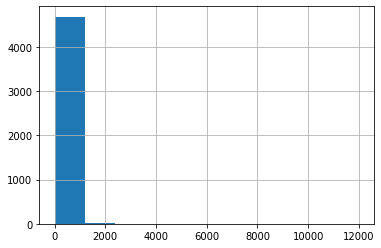

time: 156 ms (started: 2020-12-30 19:25:02 +01:00)


In [41]:
# draw a histogram from price column
listings['price'].hist();

=> From the graph and data above, we could see that the price is `right-skewed`. And there are some prices that above `upper quartile` (75% ~ \$ 120). We could define this as an outlier. (TBD in the model prediction)

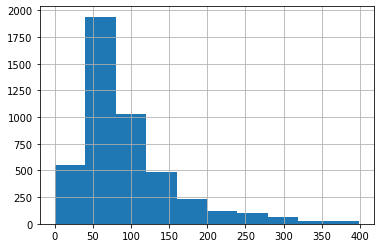

time: 187 ms (started: 2020-12-30 19:25:03 +01:00)


In [42]:
# getting better distribution with liting the price
listings[listings['price'] < 400]['price'].hist()

=> With the filter that price smaller than \$ 400, we could see the distribution better.  

With the cleaned dataframe, we are ready to analyze and answer our business questions.
We will more look into following questions:
- Which neighbourhood has the most expensive accommodation?
- What is the price range of each neighbourhood?

##  Top 10 most expensive accommodation


In [43]:
listings[['host_name', 'neighbourhood_cleansed', 'property_type', 'room_type', 'price']].head()

,host_name,neighbourhood_cleansed,property_type,room_type,price
0,Angelika,Hadern,Entire apartment,Entire home/apt,80.0
1,Alex,Sendling-Westpark,Private room in house,Private room,55.0
2,Inge,Neuhausen-Nymphenburg,Entire apartment,Entire home/apt,65.0
3,Tarek,Untergiesing-Harlaching,Private room in apartment,Private room,30.0
4,Karin,Schwabing-West,Private room in apartment,Private room,49.0


time: 15 ms (started: 2020-12-30 19:25:03 +01:00)


In [44]:
cols_to_show = ['host_name', 'neighbourhood_cleansed', 'name', 'property_type', 'room_type','bathrooms_text', 'bedrooms', 'minimum_nights', 'price']

time: 0 ns (started: 2020-12-30 19:25:03 +01:00)


In [45]:
# Top 10 most expensive accommodation
listings.sort_values(by='price', ascending=False)[cols_to_show].head(10)

,host_name,neighbourhood_cleansed,name,property_type,room_type,bathrooms_text,bedrooms,minimum_nights,price
2554,Phil,Maxvorstadt,This is a demo house - Do not book,Entire apartment,Entire home/apt,1 bath,NaN,1,12000.0
2158,Melanie,Ludwigsvorstadt-Isarvorstadt,WIESN Oktoberfest all inkl. gesamtes Isarloft,Entire apartment,Entire home/apt,1 bath,2.0,1,8000.0
2052,Melanie,Ludwigsvorstadt-Isarvorstadt,Oktoberfest all in/ Wohn u Schlafzimmer/ Isarloft,Private room in apartment,Private room,1 shared bath,1.0,2,5000.0
679,Philipp,Au-Haidhausen,Beautiful apartment in the center of Neukölln,Private room in condominium,Private room,1 bath,1.0,2,3000.0
2496,Frederics,Altstadt-Lehel,The Residence at the English Garden,Entire villa,Entire home/apt,3 baths,6.0,3,2157.0
2918,Emilio,Bogenhausen,Cheapest last room Munich - Oktoberfest 2019,Private room in house,Private room,1 private bath,1.0,1,2000.0
3108,Anja,Obergiesing,"Große, zentralgelegene Wohnung in Wiesennähe",Entire apartment,Entire home/apt,1.5 baths,4.0,3,1900.0
3110,Anja,Obergiesing,Große schöne Wohnung (12min vom Oktoberfest),Entire apartment,Entire home/apt,1.5 baths,4.0,3,1900.0
1266,Patricia,Schwanthalerhöhe,"Traumblick über München, 85qm Dachterrasse",Entire loft,Entire home/apt,2 baths,1.0,3,1500.0
1468,Max,Au-Haidhausen,3 BR Luxurious Apt near Octoberfest,Entire apartment,Entire home/apt,2 baths,3.0,3,1450.0


time: 15 ms (started: 2020-12-30 19:25:03 +01:00)


### Remove the demo house

=> we will remove the first entry, because it is only a `demo house`

In [46]:
# drop row with index 2554 => see table above
listings.drop([2554],inplace=True, errors='ignore') # errors=ignore => to ignore, if the row already deleted 
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20201026064122,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,...,10.0,9.0,9.0,NaN,f,2,2,0,0,1.21
1,170154,https://www.airbnb.com/rooms/170154,20201026064122,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,https://www.airbnb.com/users/show/108297,...,10.0,10.0,10.0,NaN,f,1,0,1,0,4.30
2,170815,https://www.airbnb.com/rooms/170815,20201026064122,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,814793,https://www.airbnb.com/users/show/814793,...,10.0,9.0,9.0,NaN,f,1,1,0,0,0.57
3,171749,https://www.airbnb.com/rooms/171749,20201026064122,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,819382,https://www.airbnb.com/users/show/819382,...,10.0,10.0,10.0,NaN,t,1,0,1,0,3.15
4,172672,https://www.airbnb.com/rooms/172672,20201026064122,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,823913,https://www.airbnb.com/users/show/823913,...,10.0,10.0,10.0,NaN,f,2,1,1,0,2.72


time: 16 ms (started: 2020-12-30 19:25:03 +01:00)


In [47]:
# Top 10 most expensive accommodation
top_10_most_expensive_listings = listings.sort_values(by='price', ascending=False)[cols_to_show].head(10)
top_10_most_expensive_listings.head(10)

,host_name,neighbourhood_cleansed,name,property_type,room_type,bathrooms_text,bedrooms,minimum_nights,price
2158,Melanie,Ludwigsvorstadt-Isarvorstadt,WIESN Oktoberfest all inkl. gesamtes Isarloft,Entire apartment,Entire home/apt,1 bath,2.0,1,8000.0
2052,Melanie,Ludwigsvorstadt-Isarvorstadt,Oktoberfest all in/ Wohn u Schlafzimmer/ Isarloft,Private room in apartment,Private room,1 shared bath,1.0,2,5000.0
679,Philipp,Au-Haidhausen,Beautiful apartment in the center of Neukölln,Private room in condominium,Private room,1 bath,1.0,2,3000.0
2496,Frederics,Altstadt-Lehel,The Residence at the English Garden,Entire villa,Entire home/apt,3 baths,6.0,3,2157.0
2918,Emilio,Bogenhausen,Cheapest last room Munich - Oktoberfest 2019,Private room in house,Private room,1 private bath,1.0,1,2000.0
3108,Anja,Obergiesing,"Große, zentralgelegene Wohnung in Wiesennähe",Entire apartment,Entire home/apt,1.5 baths,4.0,3,1900.0
3110,Anja,Obergiesing,Große schöne Wohnung (12min vom Oktoberfest),Entire apartment,Entire home/apt,1.5 baths,4.0,3,1900.0
1266,Patricia,Schwanthalerhöhe,"Traumblick über München, 85qm Dachterrasse",Entire loft,Entire home/apt,2 baths,1.0,3,1500.0
1468,Max,Au-Haidhausen,3 BR Luxurious Apt near Octoberfest,Entire apartment,Entire home/apt,2 baths,3.0,3,1450.0
2206,Hewad,Feldmoching-Hasenbergl,Reiheneckhaus nah am Olympiapark,Entire house,Entire home/apt,2 baths,4.0,2,1200.0


time: 16 ms (started: 2020-12-30 19:25:03 +01:00)


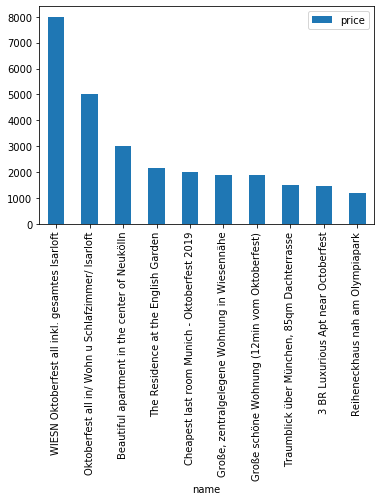

time: 281 ms (started: 2020-12-30 19:25:03 +01:00)


In [48]:
# plot a chart
top_10_most_expensive_listings[['name', 'price']].plot(x='name',kind="bar", rot=90)
plt.savefig('plot/most_expensive.png')

### Conclusion
The most expensive Airbnb accommodation in Munich is at \$ 8000 with 2 bedrooms and minimum nights only 1.   
Another interesting point is some accommodations that will require more than 1 night (*long stay*) for every book (`minimum_nights`). Therefore the rank will be useless, because the cost for each booking depends on the `minimum_nights`.

## Price range based on neighbourhood

In [49]:
cols_to_show = ['neighbourhood_cleansed', 'price']
ngh = listings[cols_to_show]
ngh

,neighbourhood_cleansed,price
0,Hadern,80.0
1,Sendling-Westpark,55.0
2,Neuhausen-Nymphenburg,65.0
3,Untergiesing-Harlaching,30.0
4,Schwabing-West,49.0
...,...,...
4689,Schwabing-Freimann,59.0
4690,Schwabing-Freimann,59.0
4691,Obergiesing,52.0
4692,Ludwigsvorstadt-Isarvorstadt,60.0


time: 0 ns (started: 2020-12-30 19:25:04 +01:00)


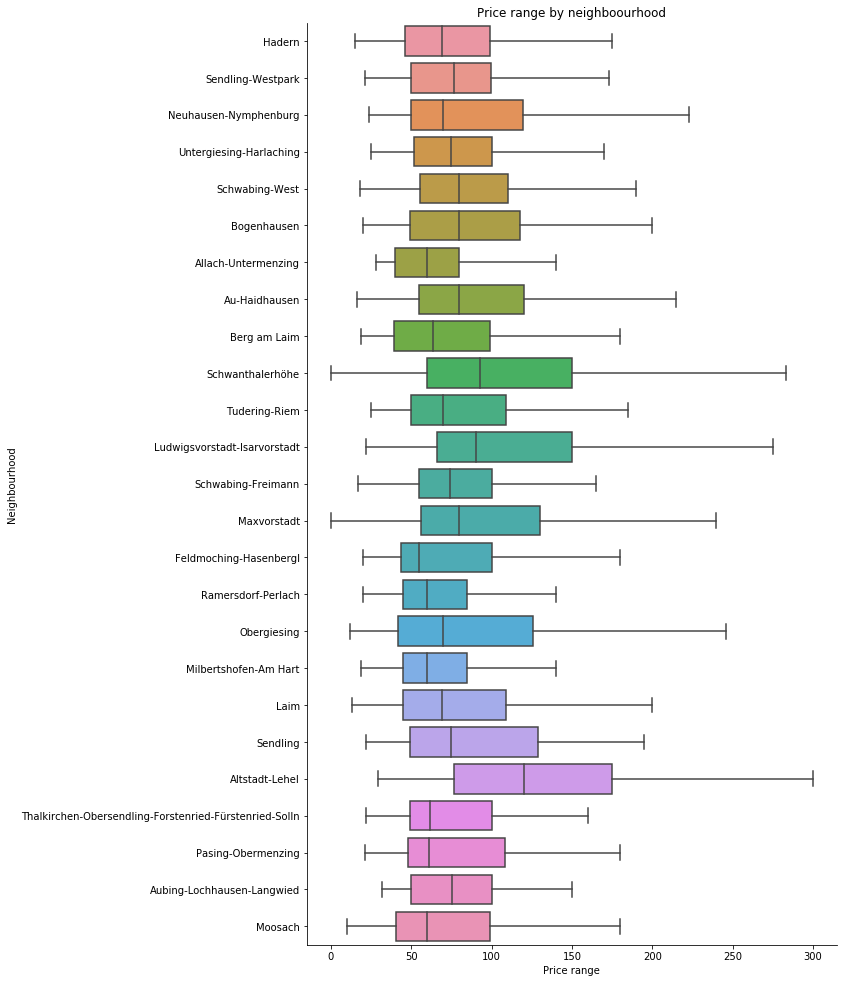

time: 1.34 s (started: 2020-12-30 19:25:04 +01:00)


In [50]:
neighbourhood_plot = sns.catplot(x='price', y='neighbourhood_cleansed',  orient="h", kind='box', data=ngh, showfliers = False)
plt.title('Price range by neighboourhood')
plt.xlabel('Price range')
plt.ylabel('Neighbourhood')
neighbourhood_plot.fig.set_size_inches(70,15)
neighbourhood_plot.savefig("plot/neighbourhood.png")

### Conclusion
As we can see, `Altstadt-Lehel` are the most expensive compared to the other neighbourhoods. The reason is because this neighbourhood are the central of the Munich City, and where the touristic area (historical) and shopping area located at.

To be noted, that there are some data, that are not shown in the graph above, because the price could be defined as an outlier (disabled with `showfliers`-flag).

# Q3: Is it possible to predict the accommodation price?

## Data understanding & Cleaning
First we need to undestand the columns we need for prediction. There are 2 types of featue that we need to prepare, the **quantitative** / continuous value feature, and **categorical** feature.

With quantitative feature we could see the highest **corrrelation** (with help of **heatmap**), and decide to drop the feature or not. If the correlation to low, then we dont need it to train our model!

With categorical value, we need to encode the value within this feature.

In [51]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4693 entries, 0 to 4693
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4693 non-null   int64  
 1   listing_url                                   4693 non-null   object 
 2   scrape_id                                     4693 non-null   int64  
 3   last_scraped                                  4693 non-null   object 
 4   name                                          4692 non-null   object 
 5   description                                   4521 non-null   object 
 6   neighborhood_overview                         2495 non-null   object 
 7   picture_url                                   4693 non-null   object 
 8   host_id                                       4693 non-null   int64  
 9   host_url                                      4693 non-null   o

### Quantitative value column

In [52]:
# getting quantitative value column
quant_cols = listings.select_dtypes(exclude=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
quant_cols.shape[1]

41

time: 16 ms (started: 2020-12-30 19:25:08 +01:00)


In [53]:
quant_cols.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,20201026064122,517685,1.0,1.0,48.11476,11.48782,2,NaN,1.0,...,10.0,10.0,9.0,9.0,NaN,2,2,0,0,1.21
1,170154,20201026064122,108297,2.0,2.0,48.10751,11.52733,4,NaN,1.0,...,10.0,10.0,10.0,10.0,NaN,1,0,1,0,4.30
2,170815,20201026064122,814793,1.0,1.0,48.16132,11.54154,2,NaN,1.0,...,10.0,10.0,9.0,9.0,NaN,1,1,0,0,0.57
3,171749,20201026064122,819382,1.0,1.0,48.10583,11.57843,1,NaN,1.0,...,10.0,10.0,10.0,10.0,NaN,1,0,1,0,3.15
4,172672,20201026064122,823913,2.0,2.0,48.16341,11.56366,2,NaN,1.0,...,10.0,10.0,10.0,10.0,NaN,2,1,1,0,2.72


time: 16 ms (started: 2020-12-30 19:25:08 +01:00)


=> we will now filter the feature with the pearson correlation

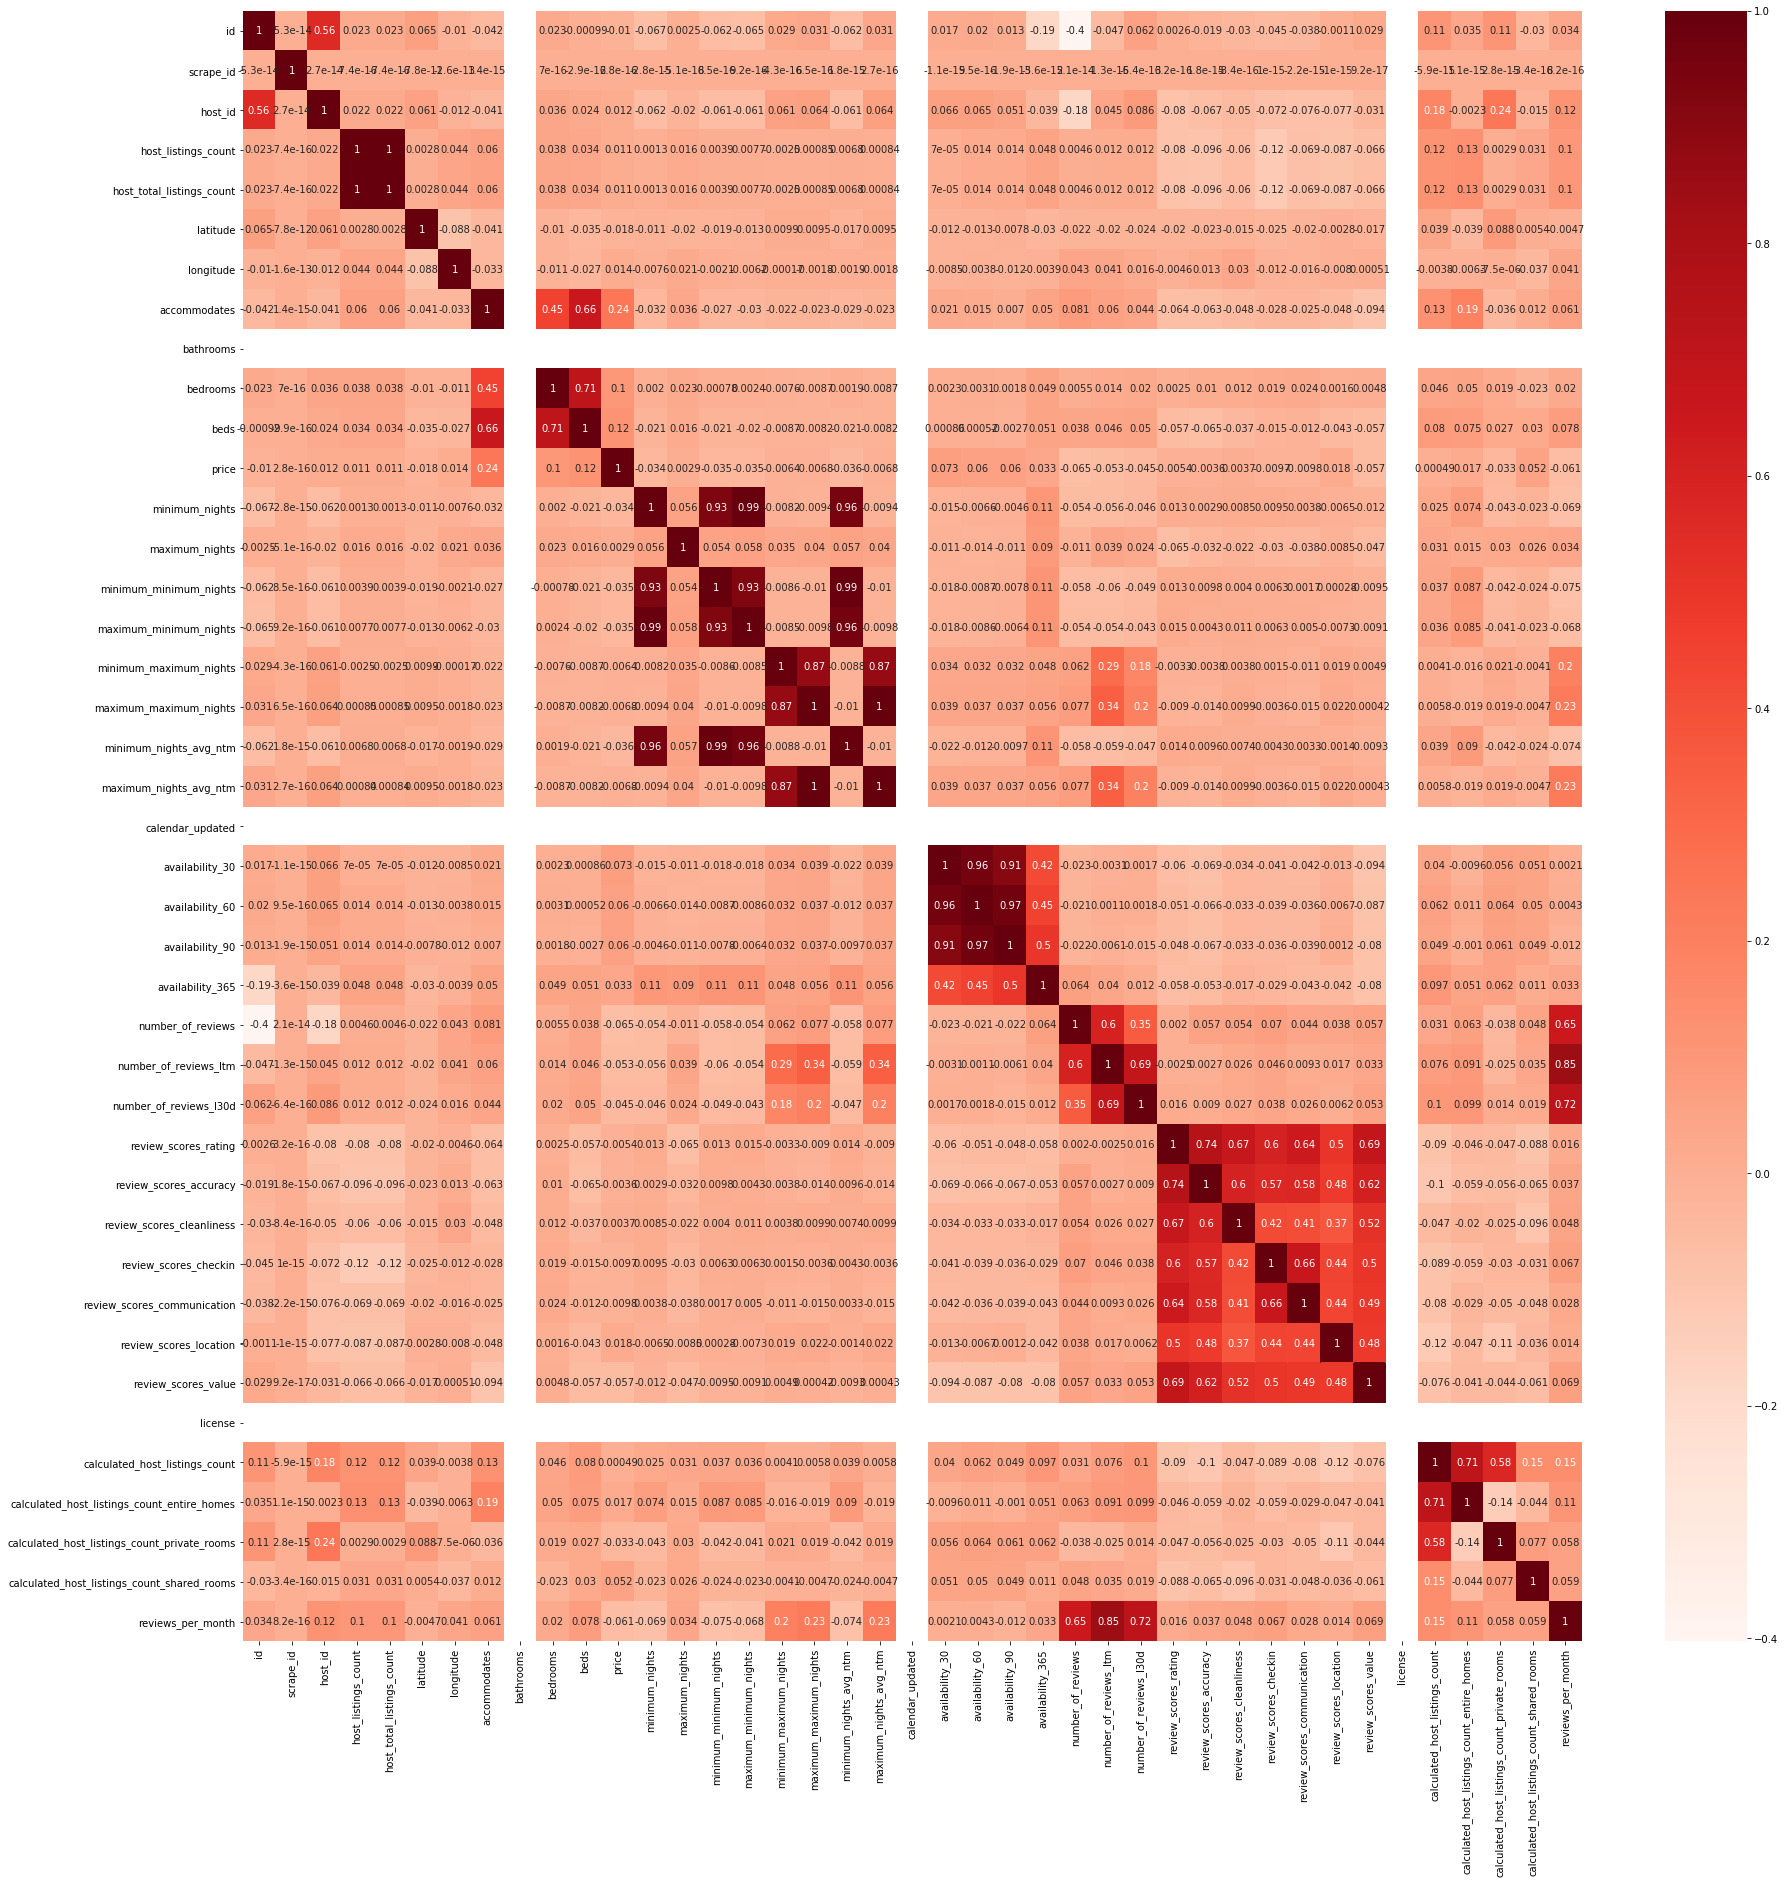

time: 6.14 s (started: 2020-12-30 19:25:08 +01:00)


In [54]:
# plotting heatmap
plt.figure(figsize=(30,30))
cor = quant_cols.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [55]:
# correlation with output variable
cor_target = cor["price"]

# selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features.sort_values()

host_listings_count                            0.011188
host_total_listings_count                      0.011188
host_id                                        0.011938
longitude                                      0.013516
calculated_host_listings_count_entire_homes    0.017442
review_scores_location                         0.017734
availability_365                               0.033149
calculated_host_listings_count_shared_rooms    0.052276
availability_90                                0.059836
availability_60                                0.060198
availability_30                                0.073071
bedrooms                                       0.103729
beds                                           0.121622
accommodates                                   0.242958
price                                          1.000000
Name: price, dtype: float64

time: 0 ns (started: 2020-12-30 19:25:15 +01:00)


=> From the results above, we could see that there are some feature, that need to be removed.
- longitude & latitude : this could define the location of listing, but we will use the `neighbourhood_cleansed`.
- host_listings_count & host_total_listings_count : both of this features has the same correlation towards price. And because the correlation is pretty low, we could remove this one too.
- host_id : unique id, therefore we could remove this feature

In [56]:
# define quantitative columns to keep
cols_to_remove = ['longitude', 'latitude', 'host_listings_count', 'host_total_listings_count', 'host_id']
quant_cols_to_keep = [el for el in list(relevant_features.index) if el not in cols_to_remove] 
print(quant_cols_to_keep)
print(f'There are {len(quant_cols_to_keep)} quantitative columns to keep from {len(quant_cols.columns)}')

quant_cols_to_remove = [el for el in list(quant_cols.columns) if el not in quant_cols_to_keep] 
print(quant_cols_to_remove)
print(f'There are {len(quant_cols_to_remove)} quantitative columns to remove from {len(quant_cols.columns)}')

['accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_location', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_shared_rooms']
There are 11 quantitative columns to keep from 41
['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_private_rooms', 'reviews_per_month']
There are 30 quantitative colu

In [57]:
# proportion of listing without price
quant_cols['price'].isnull().mean()

0.0

time: 0 ns (started: 2020-12-30 19:25:15 +01:00)


#### Dropping quantitative column with small correlation

In [58]:
listings.drop(columns=quant_cols_to_remove, axis=1, inplace=True, errors='ignore') # errors parameter to ignore if this cell called for multiple times => deterministic
listings.shape

(4693, 41)

time: 0 ns (started: 2020-12-30 19:25:15 +01:00)


In [59]:
# getting quantitative value column
quant_cols = list(listings.select_dtypes(exclude=['object']).columns) # Subset to a dataframe only holding the categorical columns
quant_cols

['accommodates',
 'bedrooms',
 'beds',
 'price',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'review_scores_location',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_shared_rooms']

time: 16 ms (started: 2020-12-30 19:25:15 +01:00)


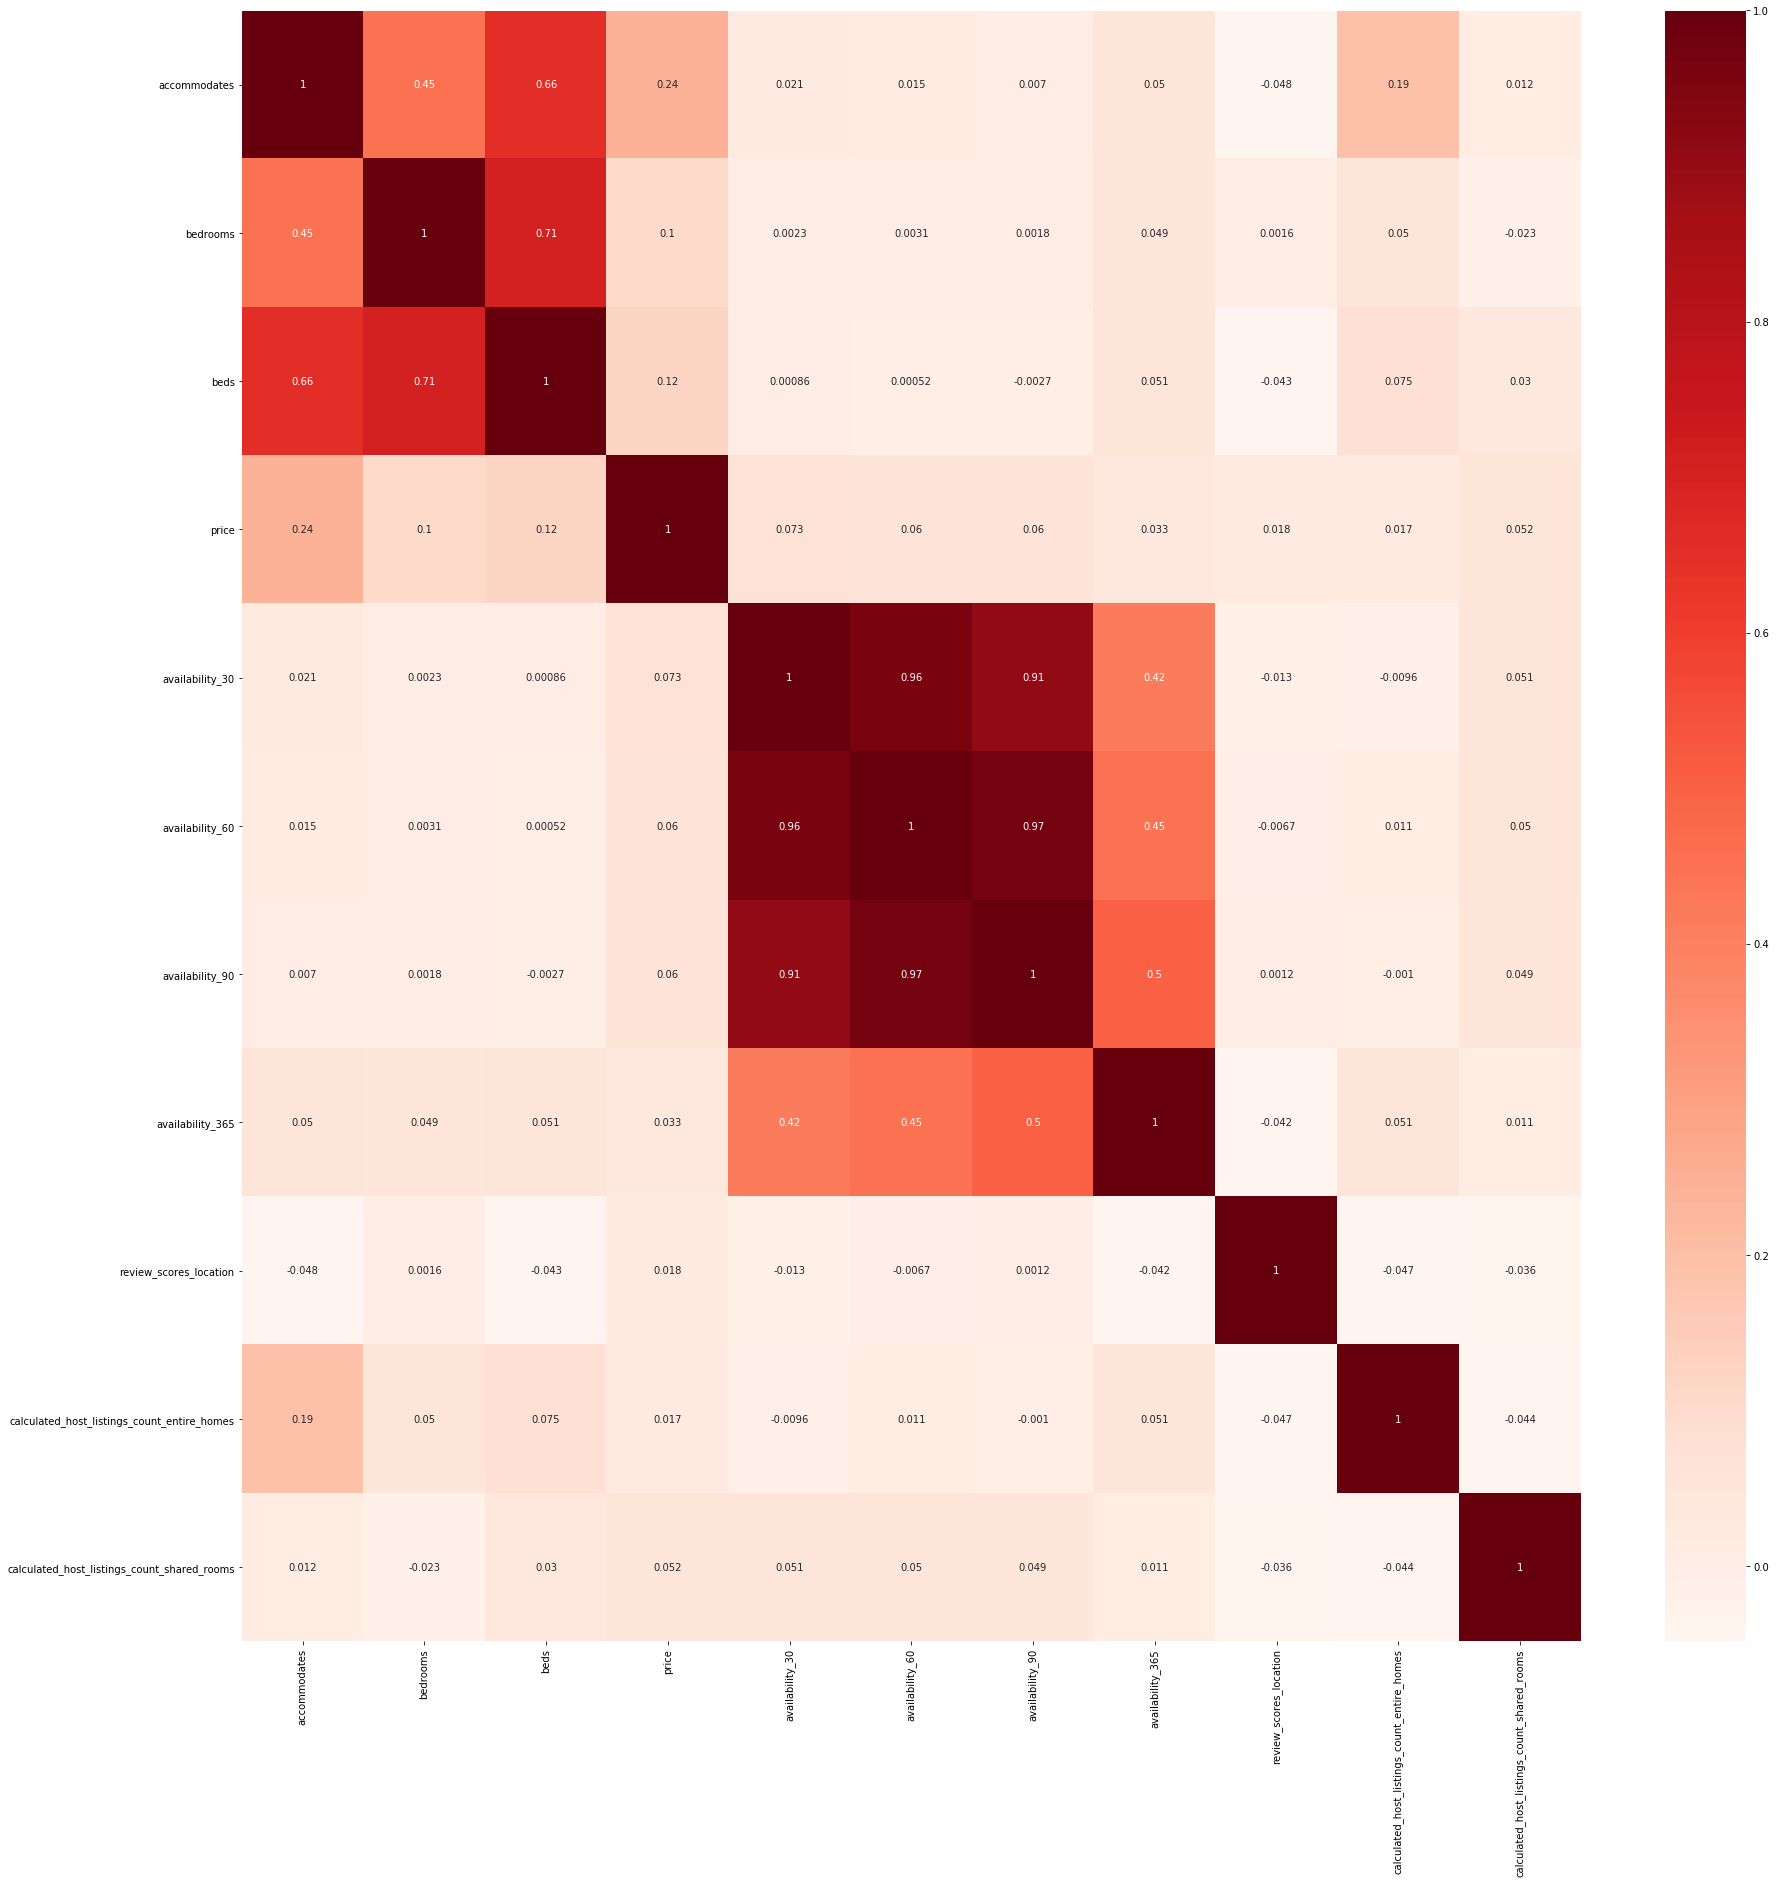

time: 1.05 s (started: 2020-12-30 19:25:15 +01:00)


In [60]:
plt.figure(figsize=(30,30))
cor = listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [61]:
listings.head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,availability_60,availability_90,availability_365,calendar_last_scraped,first_review,last_review,review_scores_location,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms
0,https://www.airbnb.com/rooms/97945,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",...,0,0,0,2020-10-26,2011-12-20,2019-10-03,9.0,f,2,0
1,https://www.airbnb.com/rooms/170154,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,https://www.airbnb.com/users/show/108297,Alex,2010-04-14,"Munich, Bayern, Germany",...,58,84,346,2020-10-26,2011-09-25,2020-09-10,10.0,f,0,0
2,https://www.airbnb.com/rooms/170815,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,https://www.airbnb.com/users/show/814793,Inge,2011-07-13,"Munich, Bavaria, Germany",...,60,90,90,2020-10-26,2011-08-31,2020-02-18,9.0,f,1,0
3,https://www.airbnb.com/rooms/171749,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,https://www.airbnb.com/users/show/819382,Tarek,2011-07-14,"Munich, Bavaria, Germany",...,18,42,50,2020-10-26,2011-07-31,2020-10-11,10.0,t,0,0
4,https://www.airbnb.com/rooms/172672,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,https://www.airbnb.com/users/show/823913,Karin,2011-07-15,"Munich, Bavaria, Germany",...,8,8,8,2020-10-26,2014-05-10,2020-09-05,10.0,f,1,0


time: 16 ms (started: 2020-12-30 19:25:17 +01:00)


=> We cleaned already the quantitative column from the dataset, and now we are ready for cleaning the categorical column

### Categorical value column

In [62]:
# getting categorical value column
cat_cols = listings.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_cols.shape[1]

30

time: 0 ns (started: 2020-12-30 19:25:17 +01:00)


In [63]:
cat_cols.head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/97945,2020-10-26,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",...,Hadern,Entire apartment,Entire home/apt,1 bath,"[""Host greets you"", ""Children\u2019s books and...",t,2020-10-26,2011-12-20,2019-10-03,f
1,https://www.airbnb.com/rooms/170154,2020-10-26,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,https://www.airbnb.com/users/show/108297,Alex,2010-04-14,"Munich, Bayern, Germany",...,Sendling-Westpark,Private room in house,Private room,1 private bath,"[""Smoke alarm"", ""Stove"", ""Iron"", ""Microwave"", ...",t,2020-10-26,2011-09-25,2020-09-10,f
2,https://www.airbnb.com/rooms/170815,2020-10-26,Your own flat near central station!,<b>The space</b><br />It's a 1-room studio app...,NaN,https://a0.muscache.com/pictures/86b4037c-098a...,https://www.airbnb.com/users/show/814793,Inge,2011-07-13,"Munich, Bavaria, Germany",...,Neuhausen-Nymphenburg,Entire apartment,Entire home/apt,1 bath,"[""Smoke alarm"", ""Essentials"", ""Heating"", ""Dish...",t,2020-10-26,2011-08-31,2020-02-18,f
3,https://www.airbnb.com/rooms/171749,2020-10-26,1min to subway - Wettersteinplatz,The apartment is located in a very quiet locat...,"Nearby is the FC Bayern Munich area, about 10 ...",https://a0.muscache.com/pictures/88ca5688-2b45...,https://www.airbnb.com/users/show/819382,Tarek,2011-07-14,"Munich, Bavaria, Germany",...,Untergiesing-Harlaching,Private room in apartment,Private room,1 shared bath,"[""Paid parking off premises"", ""Host greets you...",t,2020-10-26,2011-07-31,2020-10-11,t
4,https://www.airbnb.com/rooms/172672,2020-10-26,Cozy guest room in high-end flat.,Comfortable guest room in central area of Muni...,Residential area in Schwabing-West. There are ...,https://a0.muscache.com/pictures/41728512/72fd...,https://www.airbnb.com/users/show/823913,Karin,2011-07-15,"Munich, Bavaria, Germany",...,Schwabing-West,Private room in apartment,Private room,1.5 shared baths,"[""Paid parking off premises"", ""Smoke alarm"", ""...",t,2020-10-26,2014-05-10,2020-09-05,f


time: 16 ms (started: 2020-12-30 19:25:17 +01:00)


In [64]:
cat_cols.columns

Index(['listing_url', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')

time: 0 ns (started: 2020-12-30 19:25:17 +01:00)


In [65]:
# calculate propertion of the unique value in the listing_url => 1 means that every value comes only once! 
len(cat_cols['listing_url'].unique())/cat_cols.shape[0]

1.0

time: 0 ns (started: 2020-12-30 19:25:17 +01:00)


In [66]:
def calculate_unique_proportion(lt:float = 1, df=cat_cols) -> dict:
  '''
  Calculate the proportion of unique value. The proportion has the max value 1, which means
  that every value in the column is unique. Lower proportion => more categorical value it is.

  INPUT - lt - only return value if the proportion is less than this value
        - df - panda dataframe, with its column will be calculated its uniqueness
  OUTPUT - a dictionary contains columns name as key, and the proportion of uniqueness
  '''
  result = {}
  for col in df.columns:
    prop = len(df[col].unique())/df.shape[0]
    if prop < lt:
      result[col] = len(df[col].unique())/df.shape[0]
  return result

time: 0 ns (started: 2020-12-30 19:25:17 +01:00)


In [67]:
calculate_unique_proportion(df=cat_cols)

{'last_scraped': 0.00021308331557639036,
 'name': 0.9778393351800554,
 'description': 0.9156190070317494,
 'neighborhood_overview': 0.468357127636906,
 'picture_url': 0.9635627530364372,
 'host_url': 0.7805241849563179,
 'host_name': 0.363520136373322,
 'host_since': 0.43639463030044745,
 'host_location': 0.06371191135734072,
 'host_about': 0.36906030257830813,
 'host_response_time': 0.001065416577881952,
 'host_response_rate': 0.009162582569784786,
 'host_acceptance_rate': 0.020029831664180694,
 'host_is_superhost': 0.0006392499467291711,
 'host_thumbnail_url': 0.7766886852759429,
 'host_picture_url': 0.7766886852759429,
 'host_verifications': 0.03835499680375026,
 'host_has_profile_pic': 0.0006392499467291711,
 'host_identity_verified': 0.0006392499467291711,
 'neighbourhood_cleansed': 0.005327082889409759,
 'property_type': 0.010654165778819518,
 'room_type': 0.0008523332623055614,
 'bathrooms_text': 0.00596633283613893,
 'amenities': 0.9382058384828468,
 'has_availability': 0.00021

time: 31 ms (started: 2020-12-30 19:25:17 +01:00)


=> We will take only the feature/column which its uniqueness proportion is less than 0.1. The **reason** behind that:
- Look at the higher > 0,5 uniqueness proportion: `picture_url`, `description`, and so on. This feature is not categorical at all. Therefore we could easily remove it. Otherwise it will generate an overwhelm dummy data.
- Between 0,1-0,5 : `first_review`, `last_review`, `host_name`, and so on. This values also has useless information. 

In [68]:
small_unique_prop = calculate_unique_proportion(lt = 0.006, df=cat_cols)
small_unique_prop

{'last_scraped': 0.00021308331557639036,
 'host_response_time': 0.001065416577881952,
 'host_is_superhost': 0.0006392499467291711,
 'host_has_profile_pic': 0.0006392499467291711,
 'host_identity_verified': 0.0006392499467291711,
 'neighbourhood_cleansed': 0.005327082889409759,
 'room_type': 0.0008523332623055614,
 'bathrooms_text': 0.00596633283613893,
 'has_availability': 0.00021308331557639036,
 'calendar_last_scraped': 0.00021308331557639036,
 'instant_bookable': 0.0004261666311527807}

time: 15 ms (started: 2020-12-30 19:25:17 +01:00)


=> Still from the data above, we still have some useless features. 
- `calendar_last_scraped` : meta information from the datascraper
- `last_scraped` : meta information from the datascraper  
Therefore we will remove this manually
- `bathrooms_text`

In [69]:
del small_unique_prop['calendar_last_scraped']
del small_unique_prop['last_scraped']
del small_unique_prop['bathrooms_text']

small_unique_prop

{'host_response_time': 0.001065416577881952,
 'host_is_superhost': 0.0006392499467291711,
 'host_has_profile_pic': 0.0006392499467291711,
 'host_identity_verified': 0.0006392499467291711,
 'neighbourhood_cleansed': 0.005327082889409759,
 'room_type': 0.0008523332623055614,
 'has_availability': 0.00021308331557639036,
 'instant_bookable': 0.0004261666311527807}

time: 0 ns (started: 2020-12-30 19:25:17 +01:00)


In [70]:
cat_cols_to_keep = list(small_unique_prop)
print(cat_cols_to_keep)

cat_cols_to_remove = [el for el in list(cat_cols.columns) if el not in cat_cols_to_keep] 
print(cat_cols_to_remove)
print(f'There are {len(cat_cols_to_remove)} quantitative columns to remove from {len(cat_cols.columns)}')

['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'room_type', 'has_availability', 'instant_bookable']
['listing_url', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'property_type', 'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review']
There are 22 quantitative columns to remove from 30
time: 15 ms (started: 2020-12-30 19:25:18 +01:00)


#### Dropping categorical column


In [71]:
listings.drop(columns=cat_cols_to_remove, axis=1, inplace=True, errors='ignore') # errors parameter to ignore if this cell called for multiple times => deterministic
listings.shape

(4693, 19)

time: 16 ms (started: 2020-12-30 19:25:18 +01:00)


In [72]:
listings.head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,review_scores_location,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms
0,NaN,t,t,t,Hadern,Entire home/apt,2,1.0,1.0,80.0,t,0,0,0,0,9.0,f,2,0
1,within an hour,t,t,t,Sendling-Westpark,Private room,4,1.0,2.0,55.0,t,30,58,84,346,10.0,f,0,0
2,within a day,f,t,t,Neuhausen-Nymphenburg,Entire home/apt,2,1.0,1.0,65.0,t,30,60,90,90,9.0,f,1,0
3,within an hour,t,t,t,Untergiesing-Harlaching,Private room,1,1.0,1.0,30.0,t,0,18,42,50,10.0,t,0,0
4,within an hour,t,t,t,Schwabing-West,Private room,2,1.0,1.0,49.0,t,8,8,8,8,10.0,f,1,0


time: 0 ns (started: 2020-12-30 19:25:18 +01:00)


### Remove NAN-value only column

In [73]:
# from the list above (0 non-null = all value is NAN), we will drop following column
# safe_to_delete_cols = ['bathrooms', 'calendar_updated', 'license'] 
# listings.drop(columns=safe_to_delete_cols, axis=1, inplace=True, errors='ignore') # errors parameter to ignore if this cell called for multiple times => deterministic

time: 0 ns (started: 2020-12-30 19:25:18 +01:00)


In [74]:
listings.head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,review_scores_location,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms
0,NaN,t,t,t,Hadern,Entire home/apt,2,1.0,1.0,80.0,t,0,0,0,0,9.0,f,2,0
1,within an hour,t,t,t,Sendling-Westpark,Private room,4,1.0,2.0,55.0,t,30,58,84,346,10.0,f,0,0
2,within a day,f,t,t,Neuhausen-Nymphenburg,Entire home/apt,2,1.0,1.0,65.0,t,30,60,90,90,9.0,f,1,0
3,within an hour,t,t,t,Untergiesing-Harlaching,Private room,1,1.0,1.0,30.0,t,0,18,42,50,10.0,t,0,0
4,within an hour,t,t,t,Schwabing-West,Private room,2,1.0,1.0,49.0,t,8,8,8,8,10.0,f,1,0


time: 15 ms (started: 2020-12-30 19:25:18 +01:00)


## Modeling


In [75]:
#listings.drop(columns=['host_response_time', 'bathrooms_text'], axis=1, inplace=True, errors='ignore') # errors parameter to ignore if this cell called for multiple times => deterministic

time: 0 ns (started: 2020-12-30 19:25:18 +01:00)


In [76]:
# following method is copied from udacity notebook 
# pull a list of the column names of the categorical variables
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

time: 16 ms (started: 2020-12-30 19:25:18 +01:00)


In [77]:
listings.head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,review_scores_location,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_shared_rooms
0,NaN,t,t,t,Hadern,Entire home/apt,2,1.0,1.0,80.0,t,0,0,0,0,9.0,f,2,0
1,within an hour,t,t,t,Sendling-Westpark,Private room,4,1.0,2.0,55.0,t,30,58,84,346,10.0,f,0,0
2,within a day,f,t,t,Neuhausen-Nymphenburg,Entire home/apt,2,1.0,1.0,65.0,t,30,60,90,90,9.0,f,1,0
3,within an hour,t,t,t,Untergiesing-Harlaching,Private room,1,1.0,1.0,30.0,t,0,18,42,50,10.0,t,0,0
4,within an hour,t,t,t,Schwabing-West,Private room,2,1.0,1.0,49.0,t,8,8,8,8,10.0,f,1,0


time: 16 ms (started: 2020-12-30 19:25:18 +01:00)


In [78]:
listings  = listings.dropna(subset=['price'], axis=0)
cat_df = listings.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns
print(cat_cols_lst)
# create a dummy df and append it to the listings
listings_new = create_dummy_df(listings, cat_cols_lst, dummy_na=False) 

# Show a header of df_new to check
print(listings_new.shape)

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'room_type',
       'has_availability', 'instant_bookable'],
      dtype='object')
(4693, 45)
time: 31 ms (started: 2020-12-30 19:25:18 +01:00)


In [79]:
listings_new.head()

,accommodates,bedrooms,beds,price,availability_30,availability_60,availability_90,availability_365,review_scores_location,calculated_host_listings_count_entire_homes,...,neighbourhood_cleansed_Schwanthalerhöhe,neighbourhood_cleansed_Sendling,neighbourhood_cleansed_Sendling-Westpark,neighbourhood_cleansed_Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln,neighbourhood_cleansed_Tudering-Riem,neighbourhood_cleansed_Untergiesing-Harlaching,room_type_Hotel room,room_type_Private room,room_type_Shared room,instant_bookable_t
0,2,1.0,1.0,80.0,0,0,0,0,9.0,2,...,0,0,0,0,0,0,0,0,0,0
1,4,1.0,2.0,55.0,30,58,84,346,10.0,0,...,0,0,1,0,0,0,0,1,0,0
2,2,1.0,1.0,65.0,30,60,90,90,9.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,1.0,30.0,0,18,42,50,10.0,0,...,0,0,0,0,0,1,0,1,0,1
4,2,1.0,1.0,49.0,8,8,8,8,10.0,1,...,0,0,0,0,0,0,0,1,0,0


time: 16 ms (started: 2020-12-30 19:25:18 +01:00)


In [80]:
#Drop the rows with missing response values
listings_new  = listings_new.dropna(subset=['price'], axis=0)

#Drop columns with all NaN values
listings_new = listings_new.dropna(how='all', axis=1)

#Dummy categorical variables
listings_new = create_dummy_df(listings_new, cat_cols, dummy_na=False)

# Mean function (we are filling empty value with mean of the variable)
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
listings_new = listings_new.apply(fill_mean, axis=0)

time: 15 ms (started: 2020-12-30 19:25:18 +01:00)


In [81]:
#Split into explanatory and response variables
X = listings_new.drop('price', axis=1)
y = listings_new['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

time: 16 ms (started: 2020-12-30 19:25:18 +01:00)


In [82]:
# fitting the model
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

time: 47 ms (started: 2020-12-30 19:25:19 +01:00)


In [83]:
# predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)


time: 0 ns (started: 2020-12-30 19:25:19 +01:00)


In [84]:
# score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

time: 0 ns (started: 2020-12-30 19:25:19 +01:00)


In [85]:
# print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.10875272562395844.  The rsquared on the test data was 0.17419411634085002.
time: 0 ns (started: 2020-12-30 19:25:19 +01:00)


=> our model has r-squared value of **17,4%** which is not high.

## Coeficient weight


In [86]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df

,est_int,coefs,abs_coefs
24,neighbourhood_cleansed_Ludwigsvorstadt-Isarvor...,105.301748,105.301748
16,neighbourhood_cleansed_Altstadt-Lehel,99.858514,99.858514
42,room_type_Shared room,-92.144483,92.144483
17,neighbourhood_cleansed_Au-Haidhausen,74.727519,74.727519
34,neighbourhood_cleansed_Schwanthalerhöhe,70.156769,70.156769
38,neighbourhood_cleansed_Tudering-Riem,58.437430,58.437430
10,host_response_time_within a day,-57.145357,57.145357
12,host_response_time_within an hour,-56.168222,56.168222
25,neighbourhood_cleansed_Maxvorstadt,54.769576,54.769576
30,neighbourhood_cleansed_Pasing-Obermenzing,51.435518,51.435518


time: 16 ms (started: 2020-12-30 19:25:19 +01:00)


=> According to the data above, the neighbourhood Ludwigsvorstadt-Isarvorstadt appears to be the top indicators of the listing price. I din't expect this variable as a top indicator. My hypothesis is that the accommodates is the top indicator because of the correlation with the price. 